## A notebook to create a bar graph of datasets per organ

This recreates [https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd](https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd) and potentially all other plots for the paper.

## Install and import libraries

In [124]:
%pip install pandas seaborn numpy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Set global variables

In [2]:
hra_pop_version = 'v0.11.1'

## Load data

In [3]:
# set url
raw_url = f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/'

# load data
df_as_datasets_modality = pd.read_csv(f"{raw_url}atlas-ad-hoc/as-datasets-modality.csv")
df_dataset_cell_count_check = pd.read_csv(f"{raw_url}universe-ad-hoc/dataset-cell-count-check.csv")

df_as_datasets_modality

,sex,organId,organ_label,refOrgan,refOrganAs,dataset,tool,modality,as_label
0,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon
1,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon
2,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon
3,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,descending colon
4,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon
...,...,...,...,...,...,...,...,...,...
3146,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder
3147,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder
3148,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0001257,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,trigone of urinary bladder
3149,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder


## Visualize by organ

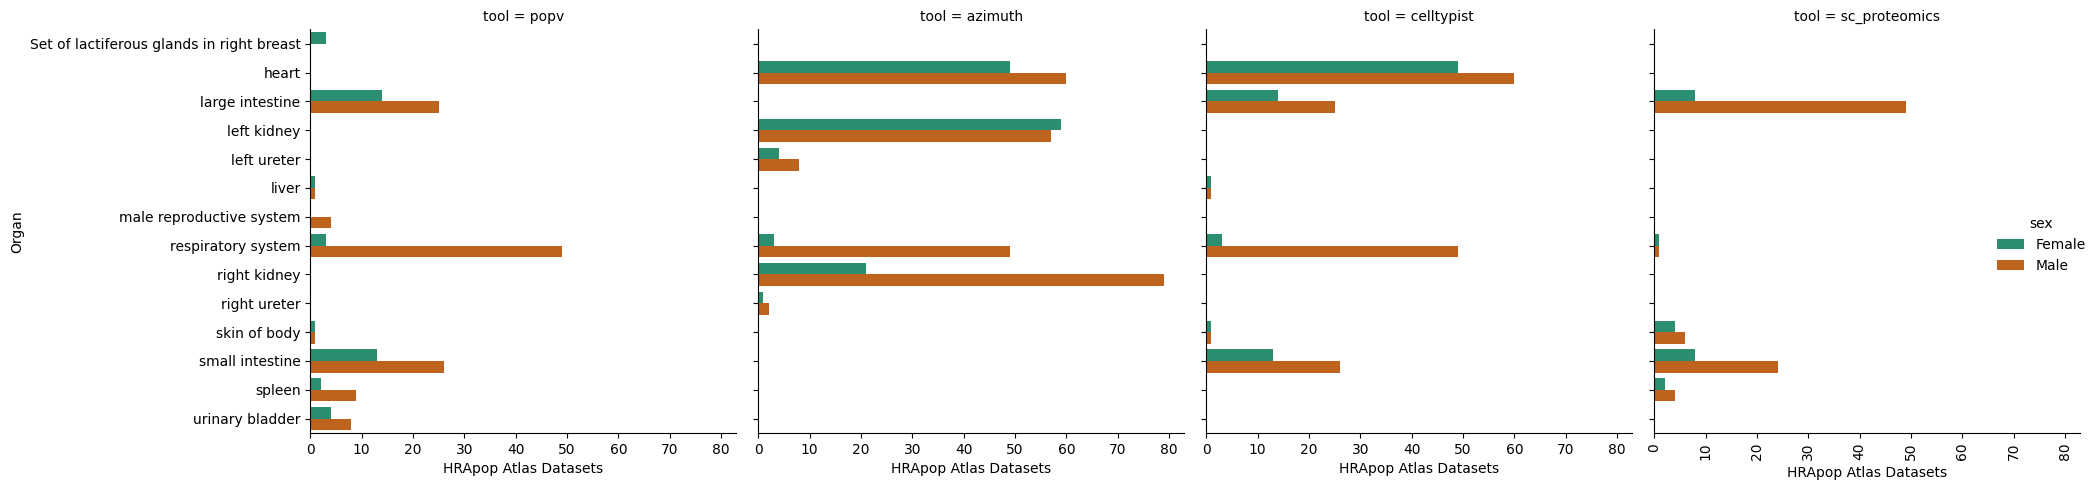

In [4]:
# create a new df that counts unique values in 'values' grouped by 'category' and 'group'
df_unique_counts = df_as_datasets_modality.groupby(['organ_label', 'tool', 'sex'])[
    'dataset'].nunique().reset_index()

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df_unique_counts,
    x='dataset',
    y='organ_label', 
    hue='sex',
    kind='bar', 
    col='tool'
)

g.set_axis_labels("HRApop Atlas Datasets", "Organ")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

## Visualize by AS and organ

In [105]:
sns.set_theme(rc={'figure.figsize': (8, 5)})  # width, height in inchdes

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 27,    # Font size for plot titles
    "axes.labelsize": 13,    # Font size for x and y labels
    "xtick.labelsize": 12.5,   # Font size for x-axis tick labels
    "ytick.labelsize": 12.5,  # Font size for y-axis tick labels
    "legend.fontsize": 17,
    "legend.title_fontsize": 17
})

In [106]:
# create new label in the format {organ}-{AS}
df_as_datasets_modality['as_label_organ'] = df_as_datasets_modality['organ_label'] + ' - ' + df_as_datasets_modality['as_label']
df_as_datasets_modality

,sex,organId,organ_label,refOrgan,refOrganAs,dataset,tool,modality,as_label,as_label_organ
0,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
1,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
2,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon,large intestine - descending colon
3,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,descending colon,large intestine - descending colon
4,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon,large intestine - descending colon
...,...,...,...,...,...,...,...,...,...,...
3146,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder,urinary bladder - fundus of urinary bladder
3147,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder,urinary bladder - fundus of urinary bladder
3148,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0001257,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,trigone of urinary bladder,urinary bladder - trigone of urinary bladder
3149,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder,urinary bladder - fundus of urinary bladder


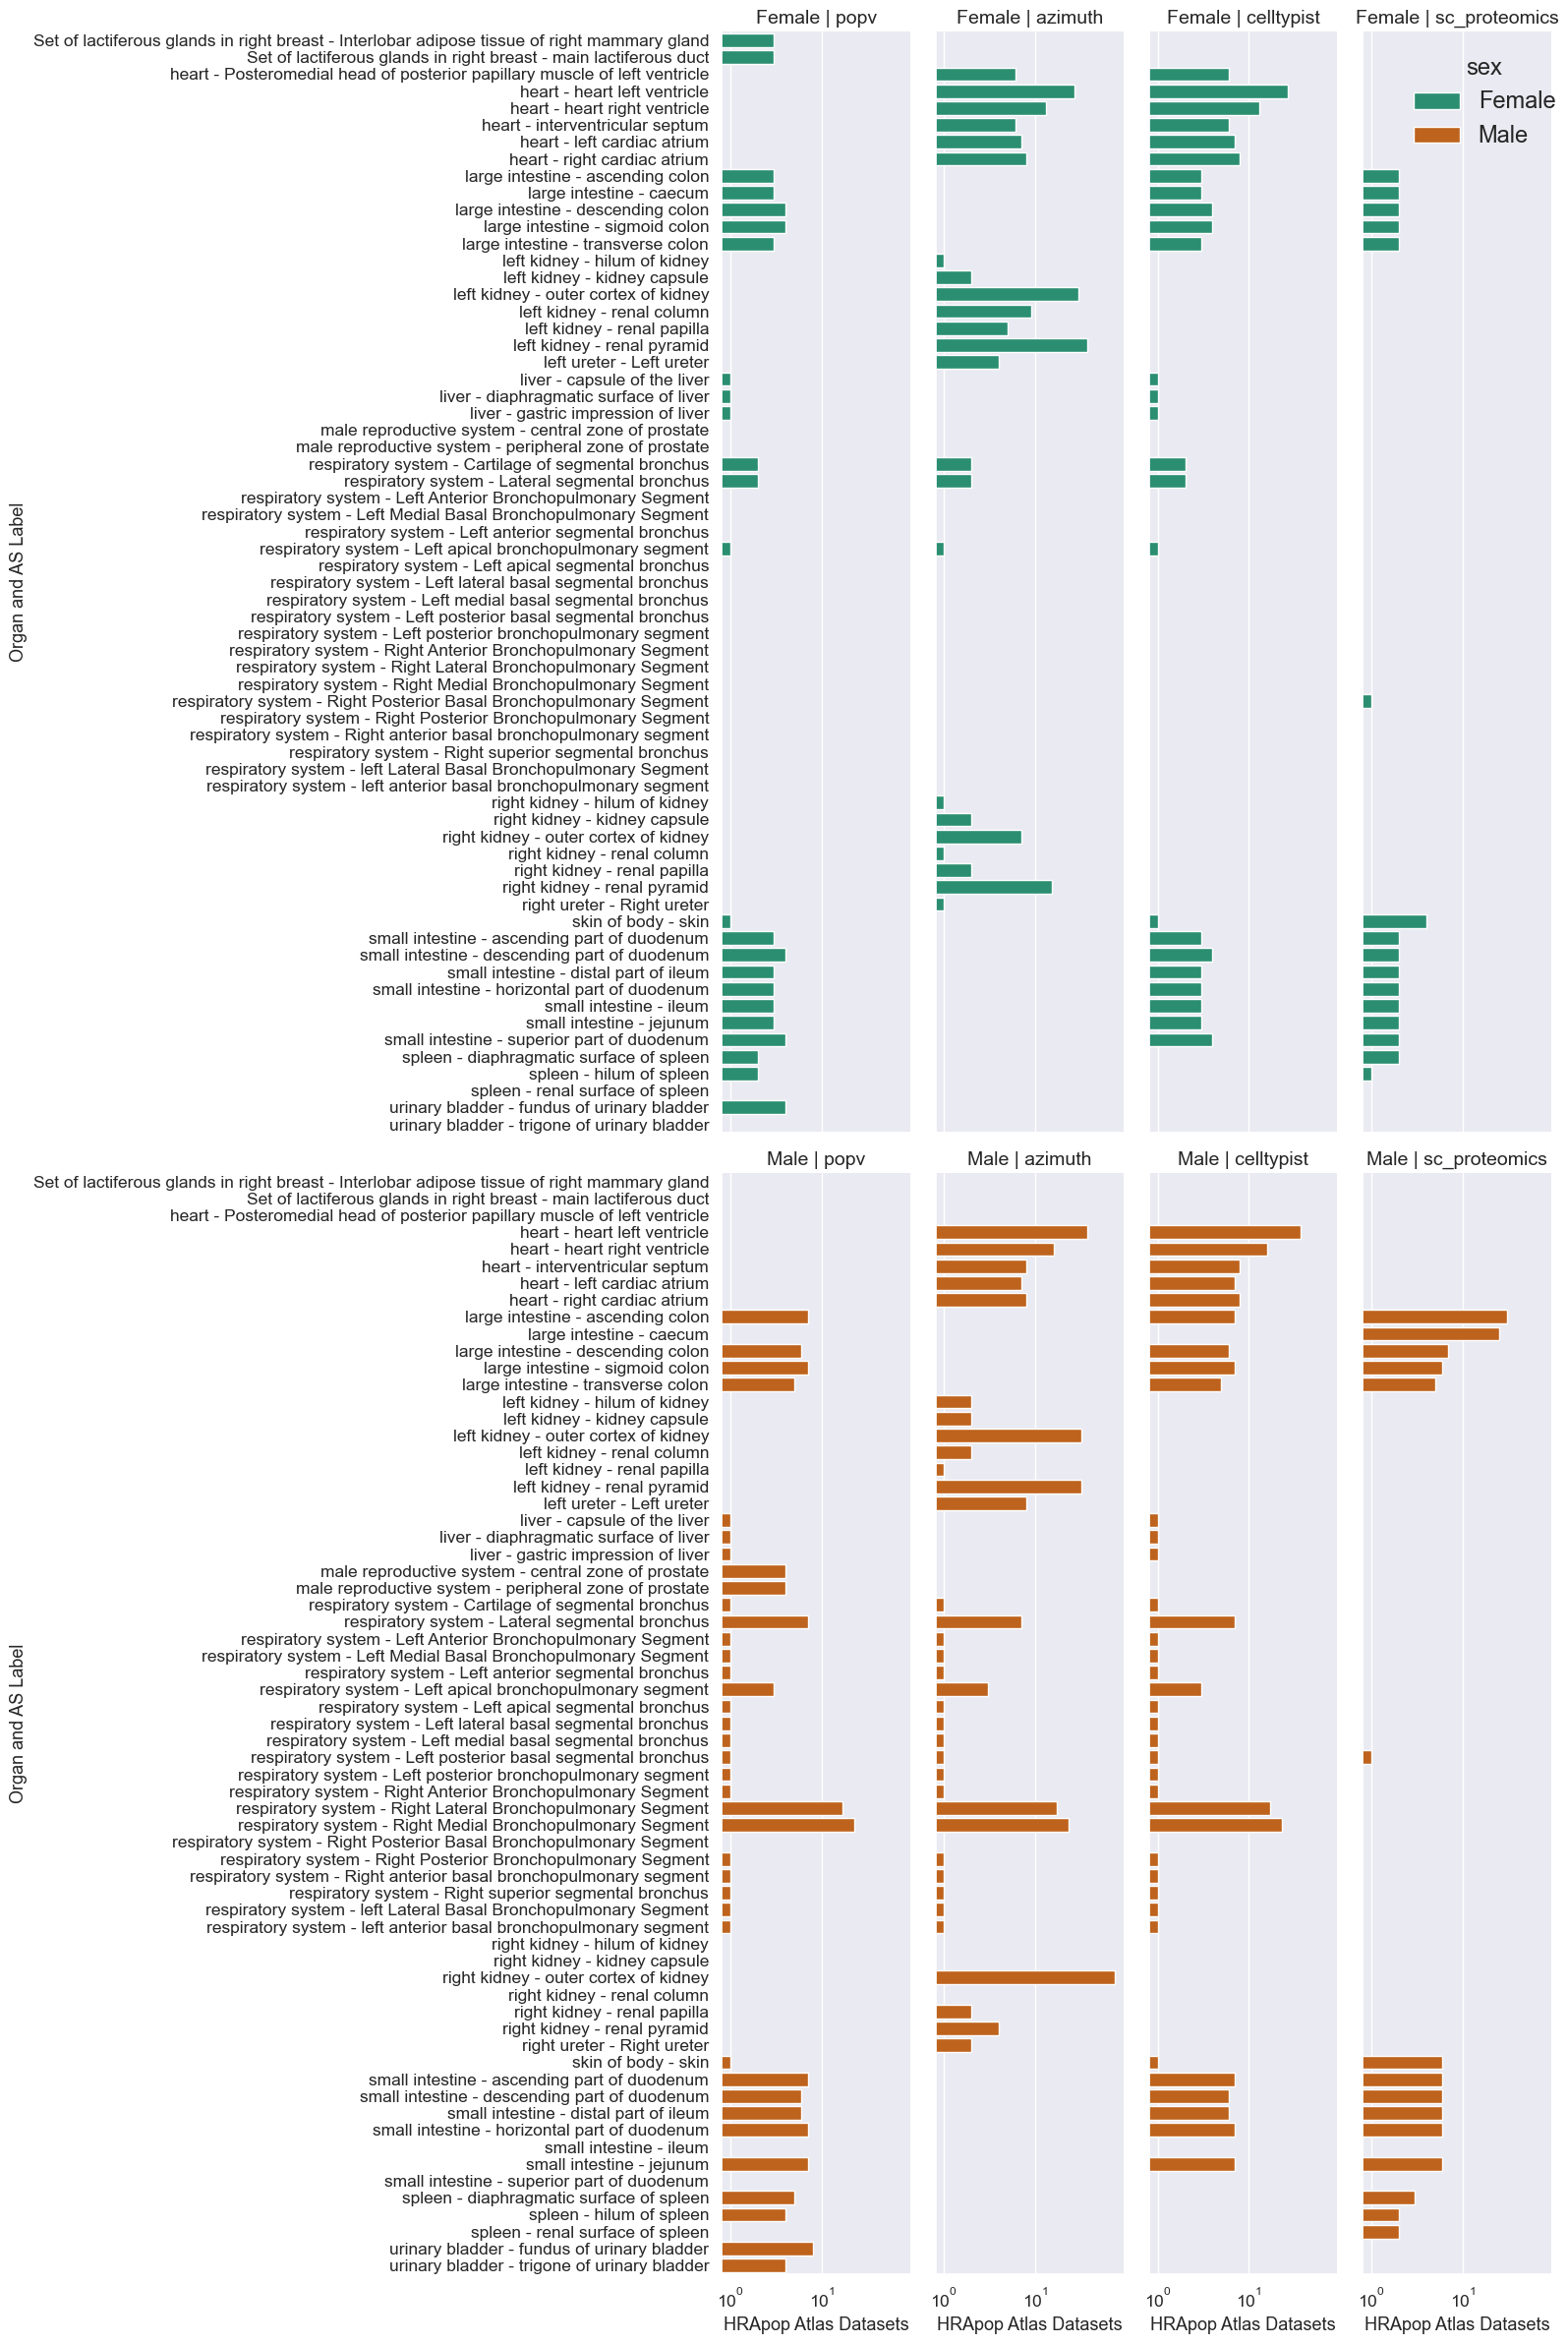

In [114]:
# get number of datasets per organ-as
# create a new df that counts unique values in 'values' grouped by 'category' and 'group'
df_unique_counts_updated_label = df_as_datasets_modality.groupby(['as_label_organ', 'tool', 'sex'])[
    'dataset'].nunique().reset_index()

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df_unique_counts_updated_label,
    x='dataset',
    y='as_label_organ',
    kind='bar',
    col='tool',
    hue='sex',
    row='sex',
    orient="h",
    height=12,
    aspect=0.3  
)

# apply log transform to x-acis
plt.xscale('log')

# adjust labels
g.set_axis_labels("HRApop Atlas Datasets", "Organ and AS Label")
g.set_titles(row_template="{row_name}", col_template="{col_name}", size=14)

# Move legend to the top right corner
g.legend.set_bbox_to_anchor((1, .95))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

## Visualize AS-AS similarity

In [116]:
# load data
df_as_as_sim = pd.read_csv(
    f"{raw_url}atlas/figure-as-as-sim.csv")

df_as_as_sim

,organId,organ,sex,modality,as1_label,as2_label,cosine_sim,as1_dataset_count,as2_dataset_count
0,UBERON:0000059,large intestine,Female,sc_transcriptomics,caecum,sigmoid colon,0.790980,30,19
1,UBERON:0000059,large intestine,Female,sc_proteomics,caecum,sigmoid colon,0.777828,30,19
2,UBERON:0000059,large intestine,Male,sc_proteomics,caecum,sigmoid colon,0.028873,30,19
3,UBERON:0004539,right kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.302370,10,88
4,UBERON:0004538,left kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.302370,10,88
...,...,...,...,...,...,...,...,...,...
344,UBERON:0002108,small intestine,Male,sc_proteomics,jejunum,Distal part of ileum,0.963359,18,17
345,UBERON:0002107,liver,Male,sc_transcriptomics,capsule of liver,Diaphragmatic surface of liver,0.686362,2,2
346,UBERON:0002107,liver,Male,sc_transcriptomics,Gastric impression of liver,Diaphragmatic surface of liver,0.686362,2,2
347,UBERON:0002106,spleen,Female,sc_proteomics,hilum of spleen,Diaphragmatic surface of spleen,0.991012,9,12


In [117]:
# get data for vis
df_heatmap = df_as_as_sim[['organ', 'sex', 'modality','as1_label', 'as2_label', 'cosine_sim']]
df_heatmap

,organ,sex,modality,as1_label,as2_label,cosine_sim
0,large intestine,Female,sc_transcriptomics,caecum,sigmoid colon,0.790980
1,large intestine,Female,sc_proteomics,caecum,sigmoid colon,0.777828
2,large intestine,Male,sc_proteomics,caecum,sigmoid colon,0.028873
3,right kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.302370
4,left kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.302370
...,...,...,...,...,...,...
344,small intestine,Male,sc_proteomics,jejunum,Distal part of ileum,0.963359
345,liver,Male,sc_transcriptomics,capsule of liver,Diaphragmatic surface of liver,0.686362
346,liver,Male,sc_transcriptomics,Gastric impression of liver,Diaphragmatic surface of liver,0.686362
347,spleen,Female,sc_proteomics,hilum of spleen,Diaphragmatic surface of spleen,0.991012


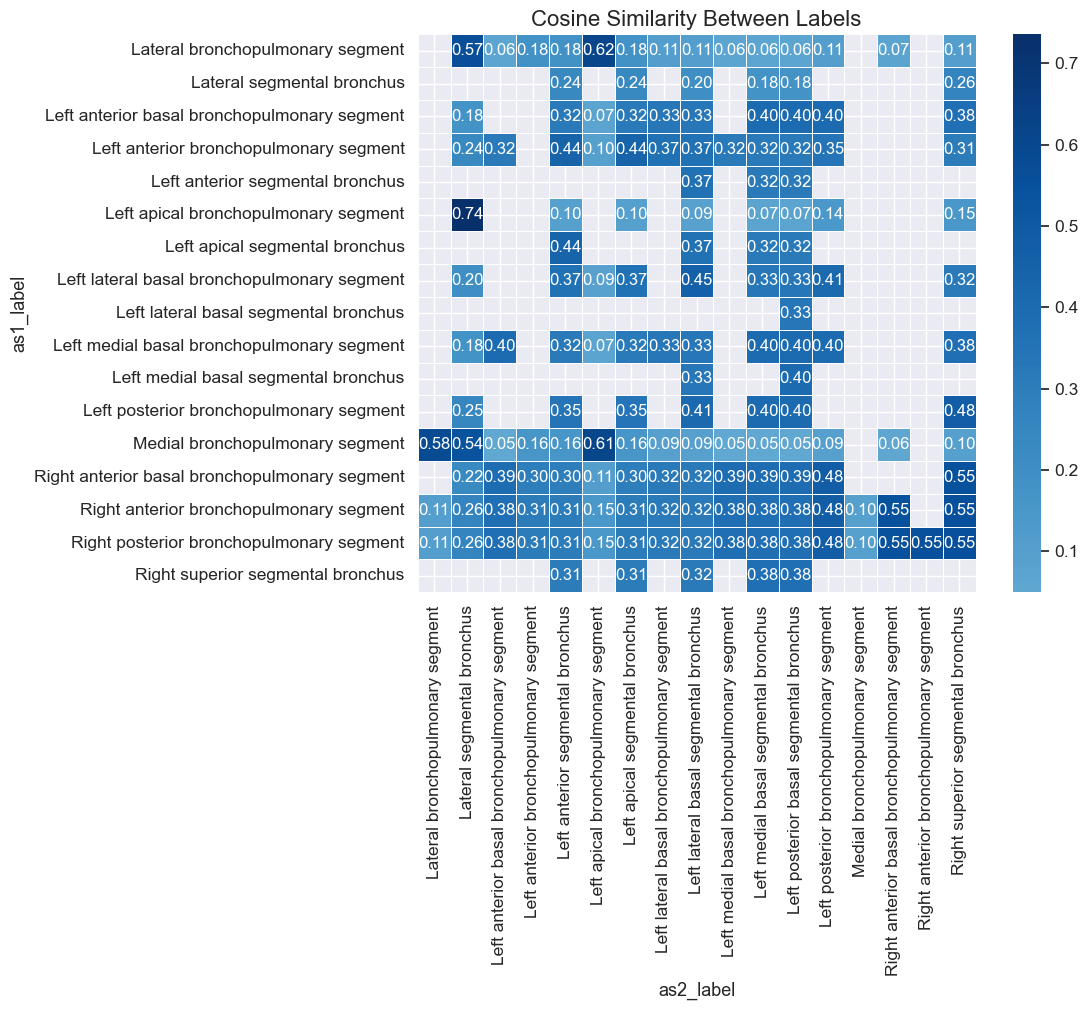

In [137]:
# Filter for a specific combination first, e.g.:
filtered_df = df_heatmap[(df_heatmap['organ'] == 'respiratory system') &
                         (df_heatmap['sex'] == 'Male') &
                         (df_heatmap['modality'] == 'sc_transcriptomics')]

# Then create the pivot table and heatmap
pivot_df = filtered_df.pivot_table(index='as1_label',
                                   columns='as2_label',
                                   values='cosine_sim')


# Create the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_df,
                      annot=True,  # Show the cosine similarity values
                      cmap='Blues',  # Blue color palette
                      fmt='.2f',  # Show 2 decimal places
                      linewidths=0.5,
                      center=0,
                      square=True)

plt.title('Cosine Similarity Between Labels', fontsize=16)
plt.tight_layout()
plt.show()